In [10]:
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [3]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']
print(male_df.Height.mean(), female_df.Height.mean())
print(male_df.Weight.mean(), female_df.Weight.mean())

69.02634590621741 63.70877360342507
187.0206206581932 135.86009300746835


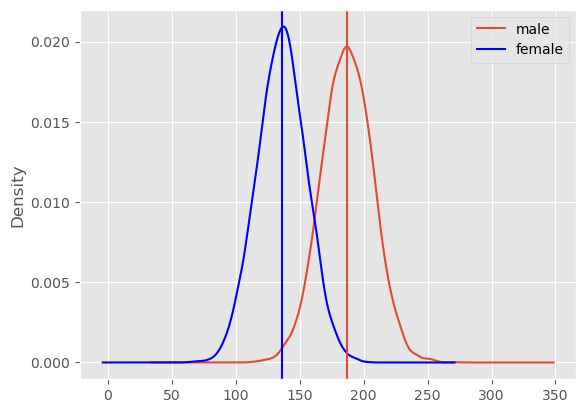

In [4]:
male_df.Weight.plot.kde(label = 'male')
female_df.Weight.plot.kde(label = 'female', color = 'b')
plt.axvline(187.02)
plt.axvline(135.86, color = 'b')

plt.legend()

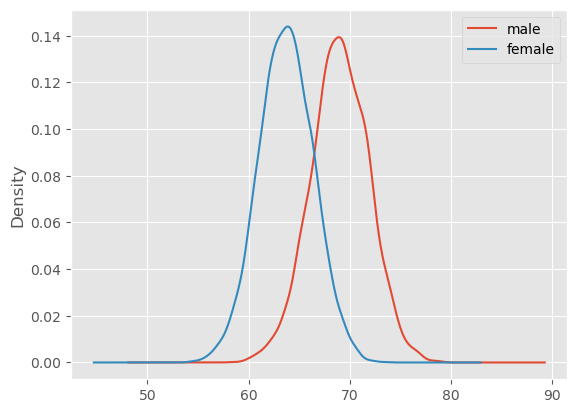

In [5]:
male_df.Height.plot.kde(label = 'male')
female_df.Height.plot.kde(label = 'female')
plt.legend();

In [6]:
x = list(data['Height'].groupby(data['Gender']))

In [7]:
female = x[0]
male = x[1]
new = pd.DataFrame([female, male])

In [8]:
new.head()

,0,1
0,Female,5000 58.910732 5001 65.230013 5002 63...
1,Male,0 73.847017 1 68.781904 2 74...


Let's plot the density plot for data in the Height column using our Seaborn functions. We'll be plotting:

a Box and Whiskers plot
a histogram
a non-parametric Kernel Density Estimation plot
Parametric distribution fit plot
... all in one single go.

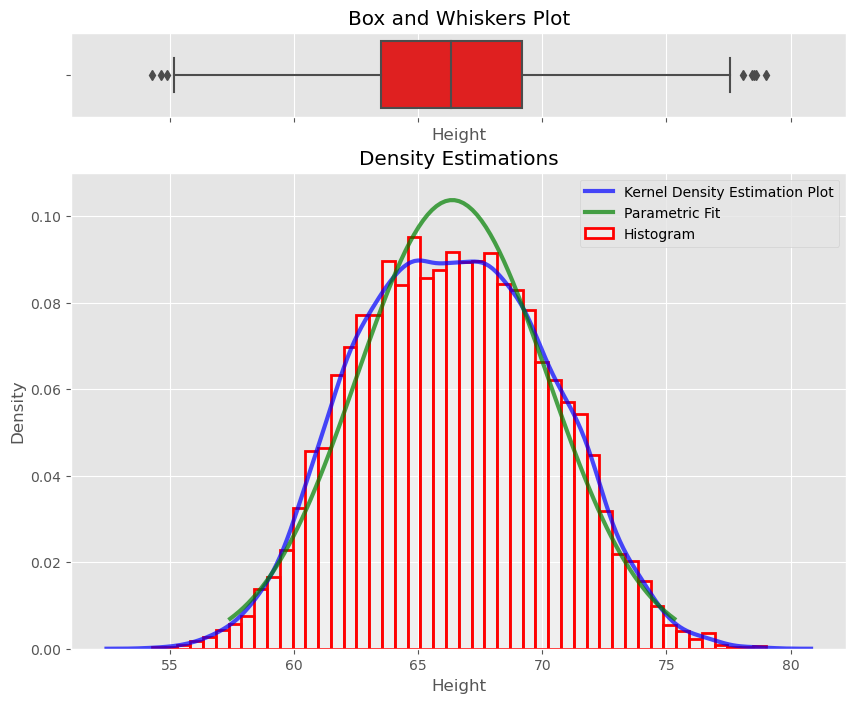

In [11]:
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.histplot(data.Height,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density",
             ax=ax2)


sns.kdeplot(data.Height,
           linewidth=3,
           color="b",
           alpha=0.7,
           label="Kernel Density Estimation Plot",
           ax=ax2)

mean = data.Height.mean()
std = data.Height.std()
parametric_dist = stats.norm(loc=mean, scale=std)
x = np.linspace(parametric_dist.ppf(0.01), parametric_dist.ppf(0.99), 100)

ax2.plot(x,
         parametric_dist.pdf(x),
            color="g",
            alpha=0.7,
            linewidth=3,
            label="Parametric Fit")

ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.08))
plt.ylim(0, 0.11)
plt.legend();